In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

In [2]:
xlsx = pd.ExcelFile('base.xlsx')
base = pd.read_excel(xlsx, 'Base')

In [3]:
base.head(15)

,PREVISAO,TEMPERATURA,UMIDADE,VENTO,VENDER
0,chuva,frio,normal,sim,parmegiana
1,chuva,moderado,alta,sim,parmegiana
2,sol,quente,alta,nao,parmegiana
3,sol,quente,alta,sim,parmegiana
4,sol,moderado,alta,nao,parmegiana
5,nublado,frio,normal,sim,feijoada
6,nublado,quente,alta,nao,feijoada
7,nublado,quente,normal,nao,feijoada
8,nublado,moderado,alta,sim,feijoada
9,chuva,frio,normal,nao,feijoada


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

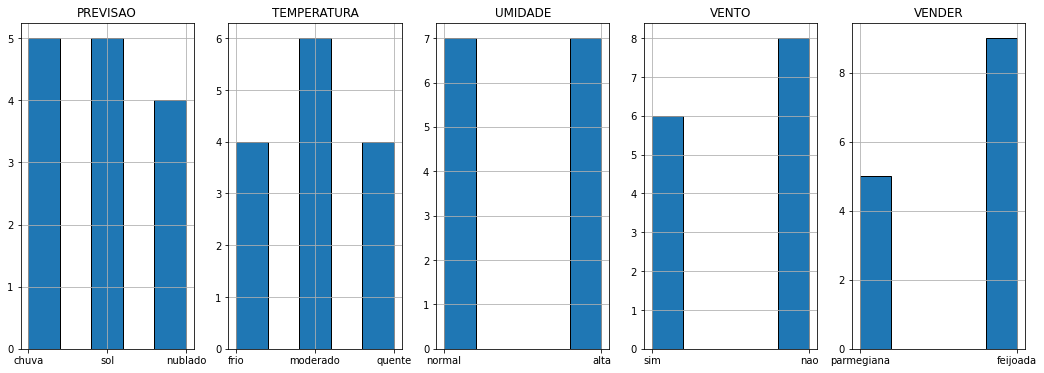

In [5]:
columns=base.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length/2),5,j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    base[i].hist(bins=5,edgecolor='black')
    plt.title(i)
plt.show()

In [6]:
column_data = {}

for column in base.columns:
    column_data[column] = base[column].tolist()

le = preprocessing.LabelEncoder()
encoded_base = {}
encoded_map = {}
for column in column_data:
    encoded_base[column] = le.fit_transform(column_data[column])
    encoded_map[column] = {}
    for value in zip(column_data[column],le.fit_transform(column_data[column])):
        encoded_map[column].update({value[0]:value[1]})

print(encoded_map)

{'PREVISAO': {'chuva': 0, 'sol': 2, 'nublado': 1}, 'TEMPERATURA': {'frio': 0, 'moderado': 1, 'quente': 2}, 'UMIDADE': {'normal': 1, 'alta': 0}, 'VENTO': {'sim': 1, 'nao': 0}, 'VENDER': {'parmegiana': 1, 'feijoada': 0}}


In [7]:
data = ['PREVISAO','TEMPERATURA','UMIDADE','VENTO']
target = 'VENDER'

recursos = []

for recurso in encoded_base:
    if recurso in data:
        recursos.append(encoded_base[recurso])
        
recursos = list(zip(*recursos))

In [8]:
modelo = GaussianNB()
modelo.fit(recursos,encoded_base[target])

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
print(encoded_map)

p_list = [
    encoded_map['PREVISAO']['sol'],
    encoded_map['TEMPERATURA']['frio'],
    encoded_map['UMIDADE']['normal'],
    encoded_map['VENTO']['sim']
]
print(p_list)
previsao= modelo.predict([p_list])
#print("Previsão: {}".format(previsao))
inv_map = {v: k for k, v in encoded_map[target].items()}
print("Previsão: {}".format(inv_map[int(previsao)].capitalize()))

{'PREVISAO': {'chuva': 0, 'sol': 2, 'nublado': 1}, 'TEMPERATURA': {'frio': 0, 'moderado': 1, 'quente': 2}, 'UMIDADE': {'normal': 1, 'alta': 0}, 'VENTO': {'sim': 1, 'nao': 0}, 'VENDER': {'parmegiana': 1, 'feijoada': 0}}
[2, 0, 1, 1]
Previsão: Feijoada
